### 1. Implement the program and explain the results.

### (a) Forward Euler Method

Use the forward Euler method to solve the following problem:

$$
y' = -5y, \quad y(0) = 1.
$$

Solve the problem for \( t \in [0, 10] \) with step sizes:

$$
h = 0.4, \quad h = 0.41, \quad h = 0.1.
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def forward_euler(lam, y0, h, T):
    N = int(np.ceil(T/h))
    t = np.linspace(0, N*h, N+1)
    t[-1] = T
    y = np.empty(N+1)
    y[0] = y0

    for n in range(N):
        y[n+1] = y[n] + h *  (lam * y[n]) # y' = lambda y
        
    return t, y

In [23]:
lam = -5.0
y_exact = lambda t: np.exp(lam*t)
T = 10.0
steps = [0.4, 0.41, 0.1]

results = {}
for h in steps:
    t, y = forward_euler(lam, 1.0, h, T)
    ye = y_exact(t)
    err = np.abs(y - ye)
    results[h] = {"t": t, "y": y, "y_exact": ye, "err": err}

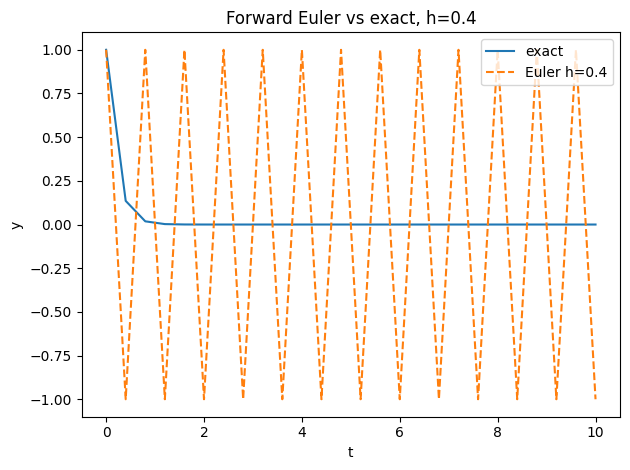

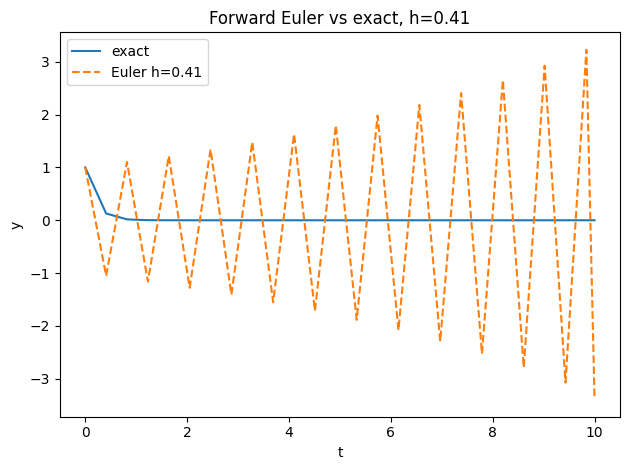

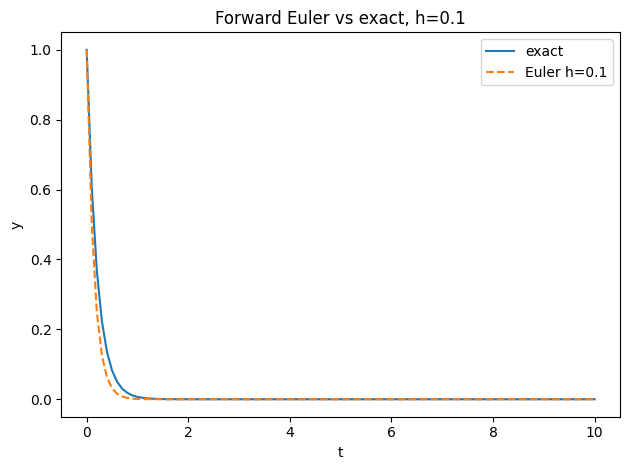

In [24]:
# Make line plots for each h (one per figure)
for h in steps:
    t = results[h]["t"]
    y = results[h]["y"]
    ye = results[h]["y_exact"]
    plt.figure()
    plt.plot(t, ye, label="exact")
    plt.plot(t, y, linestyle="--", label=f"Euler h={h}")
    plt.title(f"Forward Euler vs exact, h={h}")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend()
    plt.tight_layout()

## Forward Euler Method and Stability Analysis

Consider the initial value problem:

$$
y' = -5y, \quad y(0) = 1.
$$

Using the **Forward Euler scheme**:

$$
y_{n+1} = y_n + h f(t_n, y_n) = y_n + h(-5y_n) = (1 - 5h)y_n.
$$

Hence, the numerical solution is:

$$
y_n = (1 - 5h)^n.
$$

---

### **Stability Condition**

For the general linear test equation \(y' = \lambda y\),  
the Forward Euler method is **stable** if and only if:

$$
|1 + h\lambda| < 1.
$$

Substituting \(\lambda = -5\), we have:

$$
|1 - 5h| < 1 \quad \Longleftrightarrow \quad 0 < h < 0.4.
$$

---

### **Discussion for Different Step Sizes**

#### 🔹 Case \(h = 0.4\) (Borderline)
- \( |1 - 5h| = 1 \)  
- Then \( y_{n+1} = -y_n \Rightarrow y_n = (-1)^n \).  
- The solution neither decays nor grows; it oscillates between positive and negative values, completely missing the exponential decay of the true solution.  

#### 🔹 Case \(h = 0.41\) (Unstable)
- \( |1 - 5h| = 1.05 > 1 \)  
- The numerical solution behaves as \( y_n \approx (-1.05)^n \), causing alternating signs and exponentially increasing magnitude.  

#### 🔹 Case \(h = 0.1\) (Stable)
- \( |1 - 5h| = 0.5 < 1 \)  
- The numerical solution decays geometrically as \(0.5^n\), closely following the exact solution \(y(t) = e^{-5t}\).  
---

### (b) Backward Euler Method 

Use the backward Euler method to solve the following problem:

$$
y' = -5y, \quad y(0) = 1.
$$

Solve the problem for \( t \in [0, 10] \) with step sizes:

$$
h = 0.4, \quad h = 0.41, \quad h = 0.1.
$$

In [29]:
def backward_euler(lam, y0, h, T):
    N = int(np.floor(T / h))
    t = np.arange(N + 1) * h
    y = np.empty(N + 1)
    y[0] = y0

    amp = 1.0 / (1.0 - h * lam)
    for n in range(N):
        y[n + 1] = amp * y[n]

    rem = T - t[-1]
    if rem > 1e-12:
        t = np.append(t, T)
        y = np.append(y, y[-1] / (1.0 - rem * lam))

    return t, y


In [30]:
lam = -5.0
y_exact = lambda t: np.exp(lam*t)
T = 10.0
steps = [0.4, 0.41, 0.1]

results = {}
for h in steps:
    t, y = backward_euler(lam, 1.0, h, T)
    ye = y_exact(t)
    err = np.abs(y - ye)
    results[h] = {"t": t, "y": y, "y_exact": ye, "err": err}

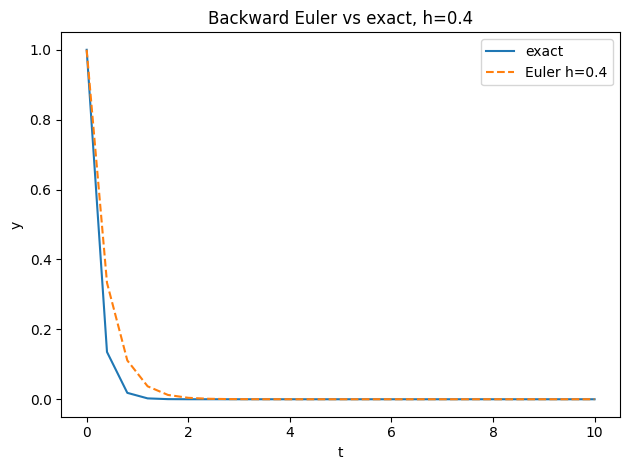

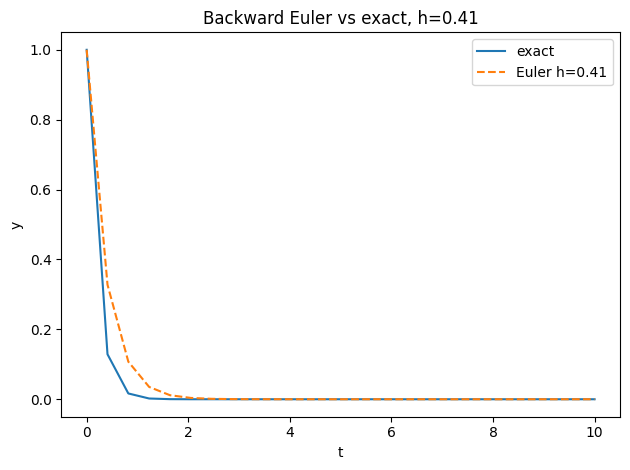

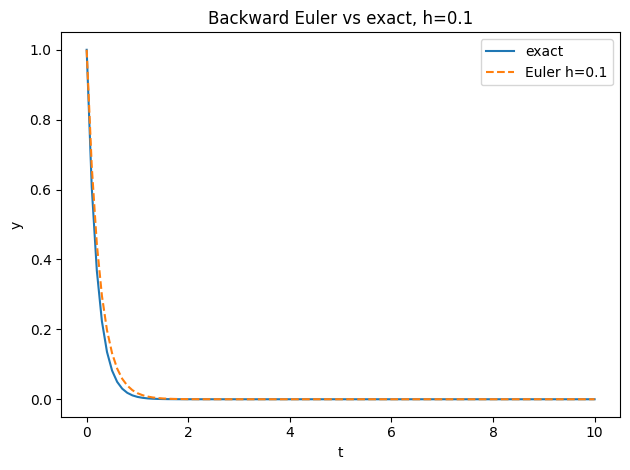

In [31]:
# Make line plots for each h (one per figure)
for h in steps:
    t = results[h]["t"]
    y = results[h]["y"]
    ye = results[h]["y_exact"]
    plt.figure()
    plt.plot(t, ye, label="exact")
    plt.plot(t, y, linestyle="--", label=f"Euler h={h}")
    plt.title(f"Backward Euler vs exact, h={h}")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend()
    plt.tight_layout()

## Backward Euler Method and Stability Analysis

Consider the initial value problem:

$$
y' = -5y, \quad y(0) = 1.
$$

Using the **Backward Euler scheme**:

$$
\frac{y_{n+1} - y_n}{h} = -5y_{n+1}
\quad \Longrightarrow \quad
y_{n+1} = \frac{1}{1 + 5h} \, y_n.
$$

Hence, the numerical solution is:

$$
y_n = \left(\frac{1}{1 + 5h}\right)^{\!n}.
$$

---

### **Stability Condition**

For the general linear test equation \(y' = \lambda y\),  
the Backward Euler method is **stable** if and only if:

$$
\left|\frac{1}{1 - h\lambda}\right| < 1.
$$

Substituting \(\lambda = -5\), we have:

$$
\left|\frac{1}{1 + 5h}\right| < 1 \quad \text{for all } h > 0.
$$

---

### **Discussion for Different Step Sizes**

#### 🔹 Case \(h = 0.4\)
- \( \left|\dfrac{1}{1 + 5h}\right| = \dfrac{1}{3} < 1 \)  
- The numerical solution converges to 0 and decays more slowly than the exact solution \(y(t) = e^{-5t}\).

#### 🔹 Case \(h = 0.41\)
- \( \left|\dfrac{1}{1 + 5h}\right| = \dfrac{1}{3.05} < 1 \)  
- The method remains stable and the numerical solution still converges to 0. 

#### 🔹 Case \(h = 0.1\)
- \( \left|\dfrac{1}{1 + 5h}\right| = \dfrac{1}{1.5} < 1 \)  
- The numerical decay rate is close to the exact solution \(y(t) = e^{-5t}\).

---

### 2. Consider solving the following problem using forward Euler method

$$
y' = y(1 - y), \quad y(0) = y_0, \quad 0 < y_0 < 1.
$$

Find the range of \( ℎ \) such that the solution is qualitatively correct.

### 1. Pre-Analysis 

#### (A) Qualitative correctness
For the solution \( y_n \) to remain physically meaningful, it should:
- \( y_n \) stay in the interval \((0,1)\),
- \( y_n \) increase monotonically,
- \( y_n \) converge to 1.

From the update rule \(y_{n+1}=y_n(1+h-hy_n)\):
- If \(0 < h \le 1\), the mapping \(g_h(y)\) sends \([0,1]\) into itself.  
  The sequence increases smoothly toward 1.
- If \(h > 1\), \(g_h(y)\) overshoots above 1, causing oscillation.

Hence, **qualitatively correct** behavior requires:

$$
\boxed{0 < h \le 1.}
$$

#### (B) Local (linear) stability
At the equilibrium \(y^* = 1\),
\[
f'(y^*) = 1 - 2y^* = -1,
\]
so the Forward Euler amplification factor is:
\[
G = 1 + h f'(y^*) = 1 - h.
\]
For numerical stability \(|G| < 1\):
\[
|1 - h| < 1 \quad \Longrightarrow \quad 0 < h < 2.
\]

Thus, for \(h > 2\), the numerical solution diverges (oscillations grow).

---

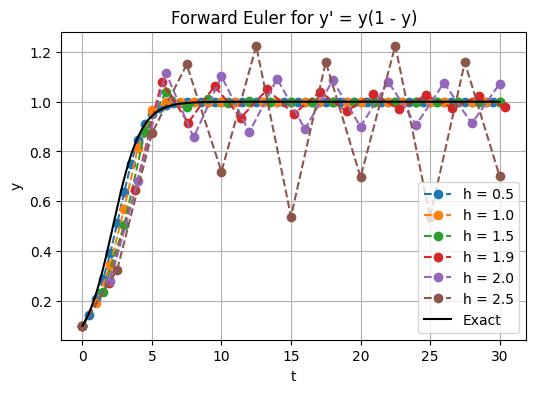

    h   mono_inc  in_(0,1)      y_last
  0.5       True      True    1.000000
  1.0       True      True    1.000000
  1.5      False     False    1.000001
  1.9      False     False    0.980198
  2.0      False     False    1.072057
  2.5      False     False    0.701126


In [38]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler_logistic(y0, h, T):
    N = int(np.ceil(T / h))
    t = np.linspace(0, N*h, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * y[n] * (1 - y[n])
    return t, y

def logistic_exact(t, y0):
    return 1.0 / (1.0 + (1.0/y0 - 1.0)*np.exp(-t))

def diagnostics(y):
    mono_inc = np.all(np.diff(y) >= -1e-12)
    in_01 = np.all((y > -1e-12) & (y < 1 + 1e-12))
    return mono_inc, in_01

# parameters
y0 = 0.1
T = 30.0
hs = [0.5, 1.0, 1.5, 1.9, 2.0, 2.5]

# plot
plt.figure(figsize=(6,4))
for h in hs:
    t, y = forward_euler_logistic(y0, h, T)
    plt.plot(t, y, 'o--', label=f"h = {h}")
t_exact = np.linspace(0, T, 800)
plt.plot(t_exact, logistic_exact(t_exact, y0), 'k-', label="Exact")
plt.title("Forward Euler for y' = y(1 - y)")
plt.xlabel("t"); plt.ylabel("y"); plt.grid(True); plt.legend()
plt.show()

# summary table
print(f"{'h':>5}  {'mono_inc':>9}  {'in_(0,1)':>8}  {'y_last':>10}")
for h in hs:
    t, y = forward_euler_logistic(y0, h, T)
    mono_inc, in_01 = diagnostics(y)
    print(f"{h:>5}  {str(mono_inc):>9}  {str(in_01):>8}  {y[-1]:>10.6f}")


### 3. Result Analysis

From both the printed diagnostics and the plotted results, we observe the following behavior for different step sizes \(h\):

#### 🔹 For \(h = 0.5, 1.0 \quad (0 < h\le 1) \)
- The numerical solution is **monotone increasing** and remains within the interval \((0,1)\).
- It converges smoothly to \(y = 1\), matching the qualitative behavior of the exact solution.
- ✅ **Qualitatively correct.**

#### 🔹 For \(h = 1.5, 1.9 \quad (1< h < 2) \)
- The numerical values begin to **overshoot** the equilibrium \(y=1\) and **oscillate** around it.
- Although the oscillations gradually damp out (because \(0 < h < 2\)),  
  this behavior is **not physically correct** for the logistic model.
- ⚠️ **Locally stable but not qualitatively correct.**

#### 🔹 For \(h = 2.5 \quad (h > 2)\)
- The oscillations **grow larger over time** instead of damping out.
- This occurs because \(|1 - h| > 1\), making the equilibrium \(y=1\) **numerically unstable**.
- ❌ **Unstable (divergent oscillation).**

---

### 5. Summary Table

| Step size \(h\) | Numerical behavior | Qualitative correctness |
|:--:|:--:|:--:|
| \(0 < h \le 1\) | Monotone increase to 1 | ✅ Correct |
| \(1 < h < 2\) | Oscillatory convergence | ⚠️ Not correct |
| \(h > 2\) | Divergent oscillation | ❌ Unstable |

---

### 6. Final Conclusion

The Forward Euler method reproduces the correct qualitative behavior of the logistic model  
**only when the step size satisfies**

$$
\boxed{0 < h \le 1.}
$$

For \(1 < h < 2\), the solution oscillates around the equilibrium,  
and for \(h > 2\), the numerical method becomes unstable.
